In [88]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd


In [89]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [90]:
from collections import Counter
from sklearn import datasets

In [91]:
import sklearn
from sklearn.datasets import fetch_openml

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [93]:
%time
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 482 µs
(70000, 784) (70000,)


In [94]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [95]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

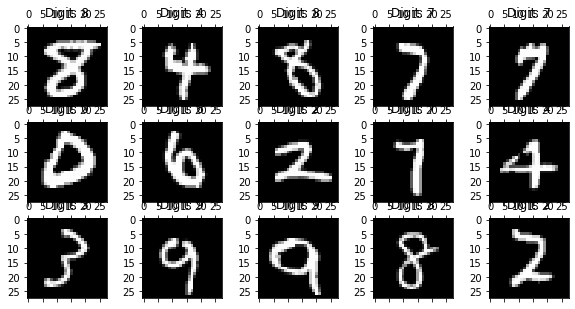

In [96]:
plt.gray()
fig = plt.figure( figsize=(10,5) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

---

# Dimensionality reduction using PCA

In [97]:
%time
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 25.5 µs
Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


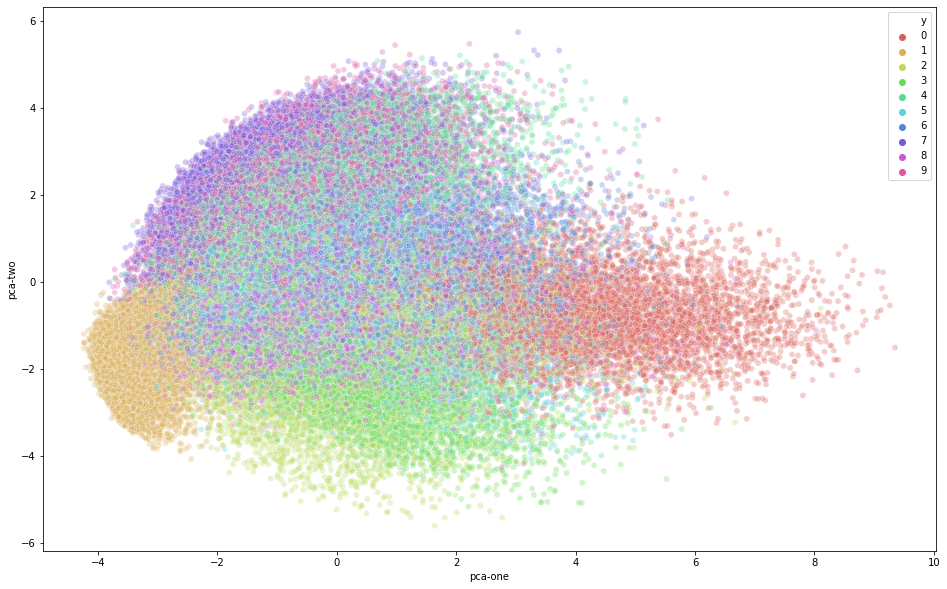

In [98]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [99]:
%time
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 24.6 µs


Text(0, 0.5, 'cumulative explained variance')

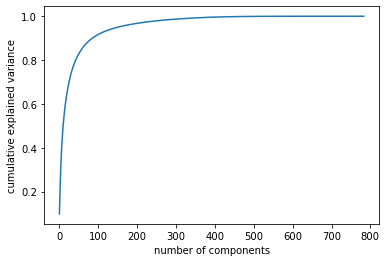

In [100]:
pca = PCA().fit(data_subset)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='1'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

---

# T-Distributed Stochastic Neighbouring Entities (t-SNE)

In [129]:
%time
N = 5000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

CPU times: user 127 µs, sys: 35 µs, total: 162 µs
Wall time: 176 µs
Explained variation per principal component: [0.09611759 0.07086586 0.06169083]


In [130]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.101s...
[t-SNE] Computed neighbors for 5000 samples in 131.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.329814
[t-SNE] Computed conditional probabilities in 1.134s
[t-SNE] Iteration 50: error = 85.5040741, gradient norm = 0.0002932 (50 iterations in 5.362s)
[t-SNE] Iteration 100: error = 81.6802673, gradient norm = 0.0022616 (50 iterations in 5.802s)
[t-SNE] Iteration 150: error = 81.0780106, gradient norm = 0.0017092 (50 iterations in 5.308s)
[t-SNE] Iteration 200: error = 80.9576797, gradient norm = 0.0009041 (50 iterations in 5.281s)
[t-SNE] Iteration 250: error = 80.9135132, gradient norm = 0.0002

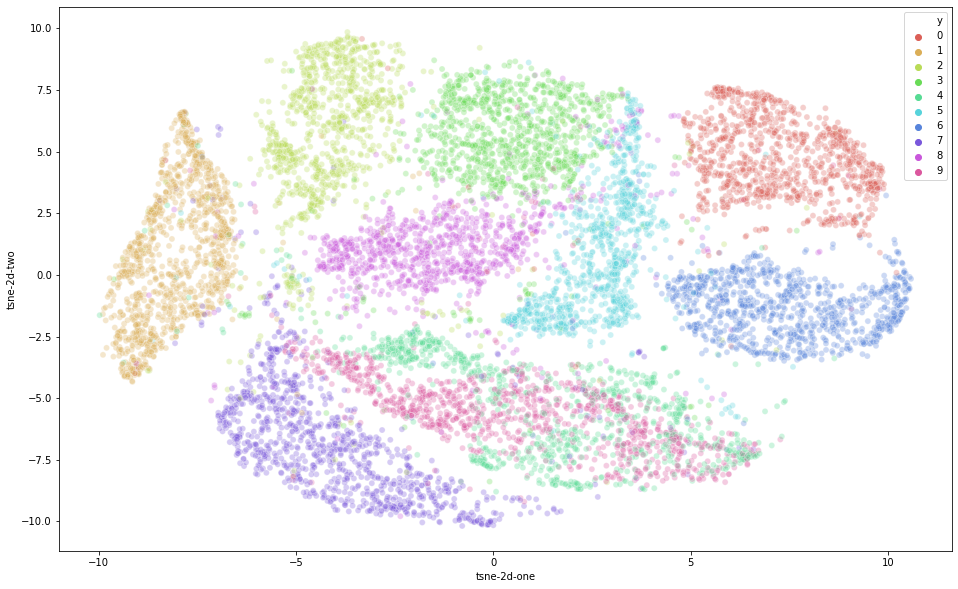

In [103]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

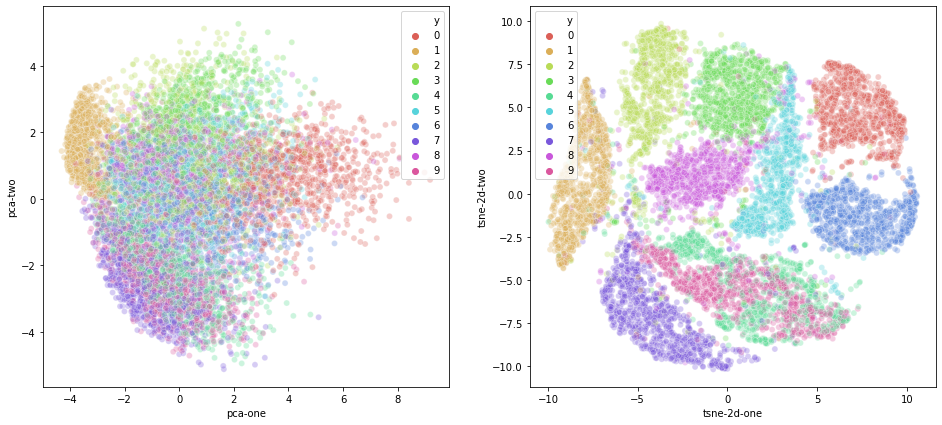

In [104]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [105]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8261610590761405


In [106]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 72.13273119926453 seconds


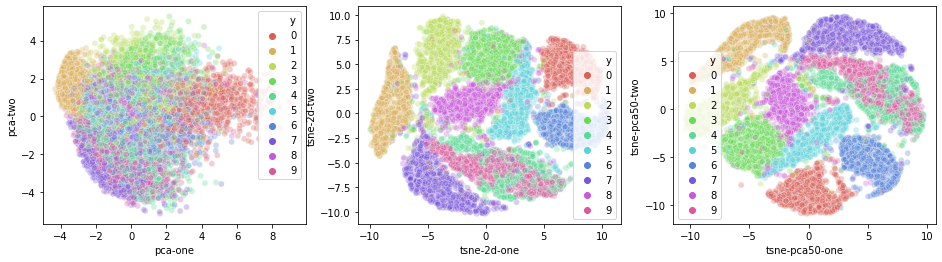

In [107]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

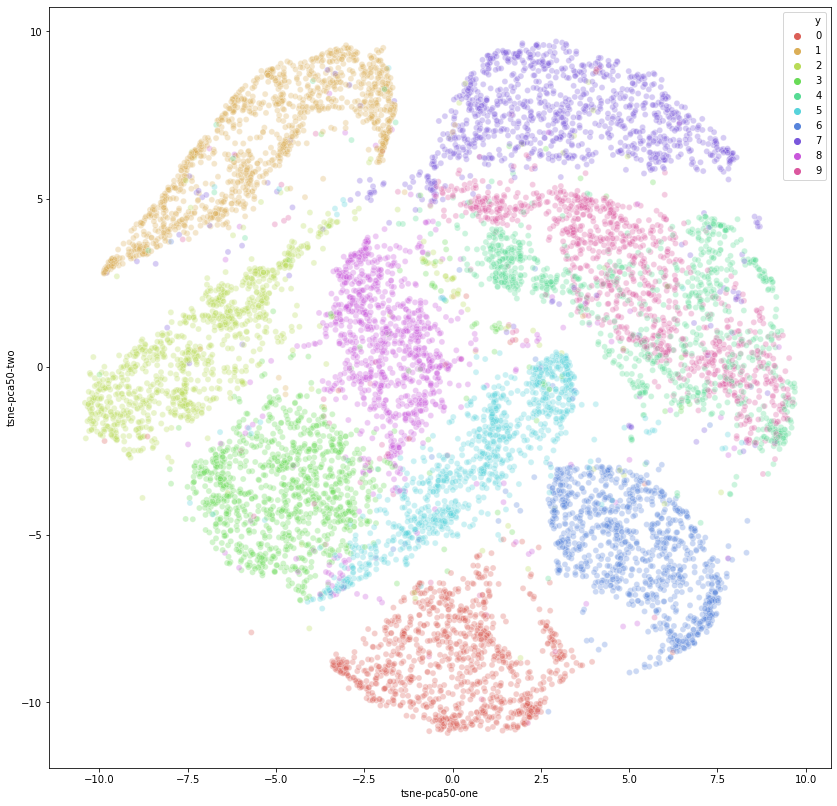

In [108]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(14,14))


ax3 = plt.subplot(1, 1, 1)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [109]:
pca_10 = PCA(n_components=10)
pca_result_10 = pca_10.fit_transform(data_subset)
print('Cumulative explained variation for 10 principal components: {}'.format(np.sum(pca_10.explained_variance_ratio_)))

Cumulative explained variation for 10 principal components: 0.489844347073021


In [110]:
pca_30 = PCA(n_components=30)
pca_result_30 = pca_30.fit_transform(data_subset)
print('Cumulative explained variation for 30 principal components: {}'.format(np.sum(pca_30.explained_variance_ratio_)))

Cumulative explained variation for 30 principal components: 0.7326126602740459


In [111]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8261739065503391


In [112]:
pca_70 = PCA(n_components=70)
pca_result_70 = pca_70.fit_transform(data_subset)
print('Cumulative explained variation for 70 principal components: {}'.format(np.sum(pca_70.explained_variance_ratio_)))

Cumulative explained variation for 70 principal components: 0.8755285590615817


In [113]:
pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(data_subset)
print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(pca_100.explained_variance_ratio_)))

Cumulative explained variation for 100 principal components: 0.9157484847210433


In [114]:
pca_150 = PCA(n_components=150)
pca_result_150 = pca_150.fit_transform(data_subset)
print('Cumulative explained variation for 150 principal components: {}'.format(np.sum(pca_150.explained_variance_ratio_)))

Cumulative explained variation for 150 principal components: 0.94929625205442


In [115]:
pca_250 = PCA(n_components=250)
pca_result_250 = pca_250.fit_transform(data_subset)
print('Cumulative explained variation for 250 principal components: {}'.format(np.sum(pca_250.explained_variance_ratio_)))

Cumulative explained variation for 250 principal components: 0.978721484265591


In [116]:
pca_500 = PCA(n_components=500)
pca_result_500 = pca_500.fit_transform(data_subset)
print('Cumulative explained variation for 500 principal compoIlynents: {}'.format(np.sum(pca_500.explained_variance_ratio_)))

Cumulative explained variation for 500 principal compoIlynents: 0.9993270647647973
